# WeatherAPI
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [58]:
# Dependencies and Setup
# Importing all the things i need to use for the project. matplotlib for graphing, pandas for dataframe management, numpy for math work, requests for API requests, time for live time imports, and scipy for more math.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from sklearn.linear_model import LinearRegression

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [21]:
# create a variable called URL to hold the API url. this is gathered from the API documentation on openweathermap.org.
city_names = []
lat = []
lng = []
temp_max = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# creating a variable called URL to hold the API call URL from openweather
url = "https://api.openweathermap.org/data/2.5/weather?"
# we want to measure in imperial units
units = "imperial"
# we've built the query URL here by plugging in a few previously defined variables.
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# use the requests.get function from the requests library to make API calls. 
response = requests.get(query_url + city)
print(response)   

# iterate over all the cities in cities in json format by using the .json at the end of the response. we're also appending the previously defined lists with the data pulled from the API calls. things like "coord" "lat" are in the API documentation.
# we're also using a try/except function to avoid any errors in pulling data. Using time.sleep allows us not to exceed the allowed amount of API calls per minute. 
for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        city_names.append(city)
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(city)
        time.sleep(1.5)
    except Exception as e:
        print(f"Error processing {city}: {e}")

<Response [200]>
isafjordur
san antonio de pale
margaret river
port-aux-francais
blackmans bay
adamstown
pandan
grytviken
thunder bay
kiunga
vilhena
guayaramerin
ushuaia
albany
severo-yeniseyskiy
sorong
awjilah
ribeirao da ilha
olonkinbyen
mananjary
tralee
haiku-pauwela
talnakh
puerto natales
gisborne
utrik
longyearbyen
waitangi
chaumont
tual
college
tarko-sale
ta`u
belmonte
ipoh
puerto santa
eydhafushi
thompson
el granada
sarandi
concepcion
nemuro
lazaro cardenas
ar ruways
sitka
petropavlovsk-kamchatsky
kailua-kona
jamestown
xilin hot
Error processing 'ohonua: 'coord'
udachny
santa elena de uairen
vila franca do campo
nar'yan-mar
marshfield
khanty-mansiysk
Error processing tranovaho: 'coord'
at taj
vernon
grevena
santa teresa di riva
as sulayyil
kodiak
pemangkat
hamilton
port elizabeth
Error processing taiohae: 'coord'
roxas
port mathurin
tagiura
vilyuchinsk
saipan
tiksi
bathsheba
nikolayevsk-on-amure
new norfolk
penzance
tinajo
hawaiian paradise park
k'olito
praia da vitoria
gadzhiye

In [25]:
# printing the length of the lists to see that city_names has more than the rest, so we need to essentially limit the number of things that can be in a column, using a for i in range function.
list_lengths = [len(city_names), len(lat), len(lng), len(temp_max), len(humidity), len(cloudiness), len(wind_speed), len(country), len(date)]
# using min_length = min stores the minimum of all the columns, in this case 558
min_length = min(list_lengths)

#we need to create a new list of the cleaned values
city_names_cleaned = [city_names[city] for city in range(min_length)]






### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [84]:
# create a list named 'data' to hold all the lists we just appended using API calls. we have to add the [:min length] to the end of each to make sure we're just pulling from the one new list.
data = {
    'City': city_names_cleaned,
    'Latitude': lat[:min_length],
    'Longitude': lng[:min_length],
    'Max Temperature (F)': temp_max[:min_length],
    'Humidity (%)': humidity[:min_length],
    'Cloudiness (%)': cloudiness[:min_length],
    'Wind Speed (m/s)': wind_speed[:min_length],
    'Country': country[:min_length],
    'Date': date[:min_length]
}

#create a dataframe out of this
df = pd.DataFrame(data)
# send it to a csv file, make sure the index isn't included in the df
df.to_csv('../output_data/weather_data.csv', index=False)
#print the first 5 rows of the dataframe
df.head()


,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
0,isafjordur,66.0755,-23.1240,46.92,81,26,0.11,IS,1689818357
1,san antonio de pale,-1.4014,5.6325,73.92,83,100,12.15,GQ,1689818357
2,margaret river,-33.9500,115.0667,58.48,65,84,13.85,AU,1689818358
3,port-aux-francais,-49.3500,70.2167,37.51,99,100,32.66,TF,1689818358
4,blackmans bay,-43.0167,147.3167,49.73,69,100,17.49,AU,1689818359


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

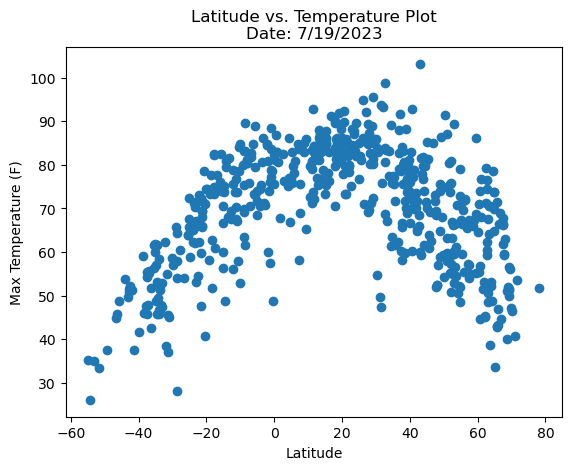

In [80]:
plt.scatter(df['Latitude'], df['Max Temperature (F)'])
plt.title('Latitude vs. Temperature Plot\nDate: 7/19/2023')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('../images/lat_v_temp.png', dpi=300, bbox_inches='tight')

## Latitude vs. Humidity Plot

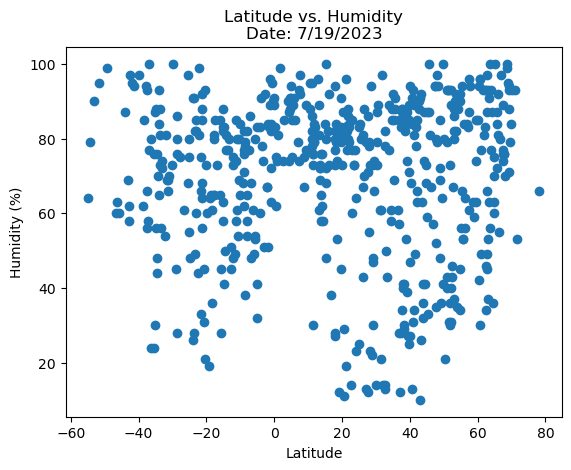

In [81]:
plt.scatter(df['Latitude'], df['Humidity (%)'])
plt.title('Latitude vs. Humidity\nDate: 7/19/2023')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('../images/lat_v_humidity.png', dpi=300, bbox_inches='tight')

## Latitude vs. Cloudiness Plot

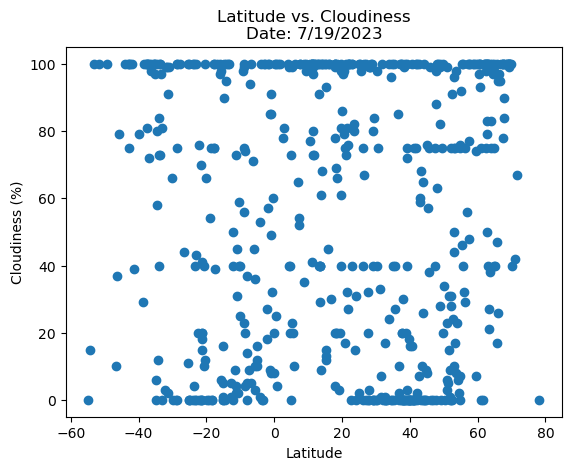

In [82]:
plt.scatter(df['Latitude'], df['Cloudiness (%)'])
plt.title('Latitude vs. Cloudiness\nDate: 7/19/2023')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('../images/lat_v_cloudiness.png', dpi=300, bbox_inches='tight')

## Latitude vs. Wind Speed Plot

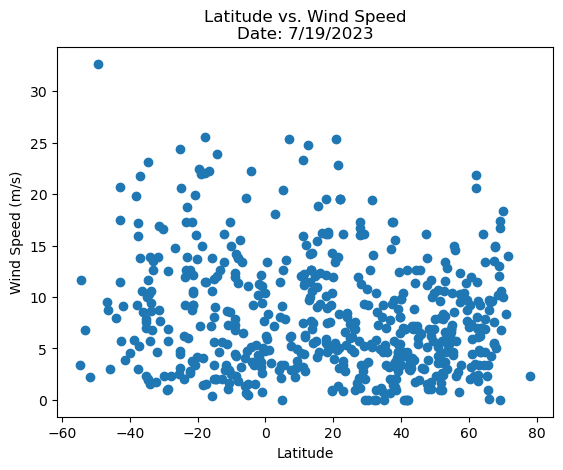

In [83]:
plt.scatter(df['Latitude'], df['Wind Speed (m/s)'])
plt.title('Latitude vs. Wind Speed\nDate: 7/19/2023')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.savefig('../images/lat_v_wind_speed.png', dpi=300, bbox_inches='tight')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

C:\Users\Athen\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Latitude', ylabel='Max Temperature (F)'>

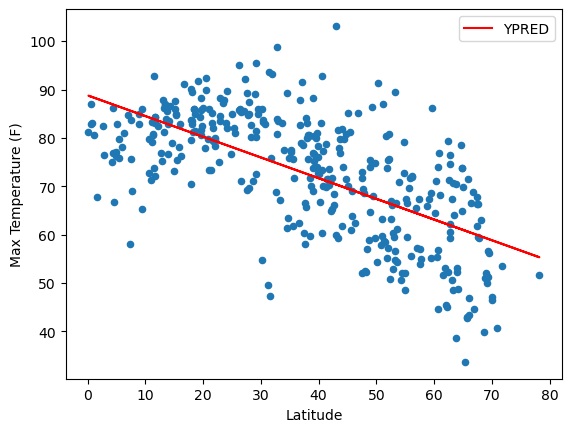

In [ ]:
# define two dataframes for N vs S filtering out by latitude greater than 0 or less than 0
northern_hemisphere = df[df['Latitude'] > 0]
southern_hemisphere = df[df['Latitude'] < 0]
# define x and y, which are the two columns we want to graph
x = northern_hemisphere['Latitude'].values.reshape(-1, 1) 
y = northern_hemisphere['Max Temperature (F)'].values.reshape(-1, 1) 
# name the model, assign it to LinearRegression and fit the model with X and Y
model = LinearRegression()
model.fit(x, y)

# use model.predict to show the linear regression on a new column named YPRED for the predicted line.
northern_hemisphere['YPRED'] = model.predict(x)
ax = northern_hemisphere.plot.scatter(x='Latitude', y='Max Temperature (F)')
northern_hemisphere.plot(x='Latitude', y='YPRED', color='red', ax=ax)

# the linear regression model here is modeling that the further away from the equator (0) you get, the lower the maximum temperature is going to be. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

C:\Users\Athen\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Latitude', ylabel='Max Temperature (F)'>

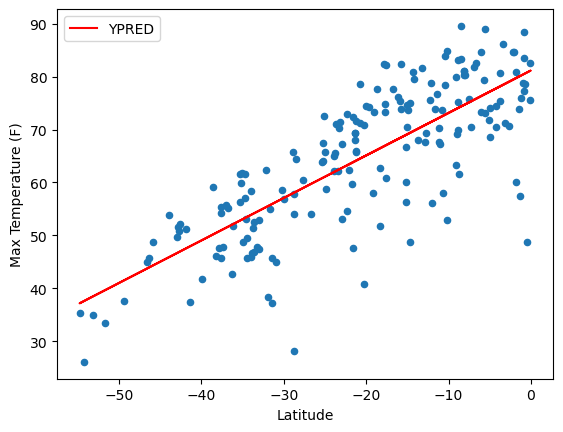

In [69]:
x = southern_hemisphere['Latitude'].values.reshape(-1, 1) 
y = southern_hemisphere['Max Temperature (F)'].values.reshape(-1, 1) 
model = LinearRegression()
model.fit(x, y)

southern_hemisphere['YPRED'] = model.predict(x)
ax = southern_hemisphere.plot.scatter(x='Latitude', y='Max Temperature (F)')
southern_hemisphere.plot(x='Latitude', y='YPRED', color='red', ax=ax)

# the linear regression model here is modeling that the closer to the equator (0) you get, the higher the maximum temperature is going to be. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

C:\Users\Athen\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Latitude', ylabel='Humidity (%)'>

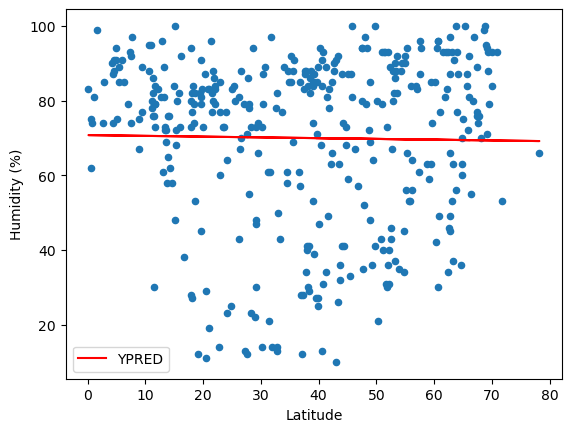

In [70]:
x = northern_hemisphere['Latitude'].values.reshape(-1, 1) 
y = northern_hemisphere['Humidity (%)'].values.reshape(-1, 1) 
model = LinearRegression()
model.fit(x, y)

northern_hemisphere['YPRED'] = model.predict(x)
ax = northern_hemisphere.plot.scatter(x='Latitude', y='Humidity (%)')
northern_hemisphere.plot(x='Latitude', y='YPRED', color='red', ax=ax)
# this model is showing humidity levels based on latitude. I don't see much of a pattern here, and the line seems to be mostly random, aside from the beginning there it seems there is a patters of cities between 0 and about 30 latitude that are all pretty close to 70-75% humidity. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

C:\Users\Athen\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Latitude', ylabel='Humidity (%)'>

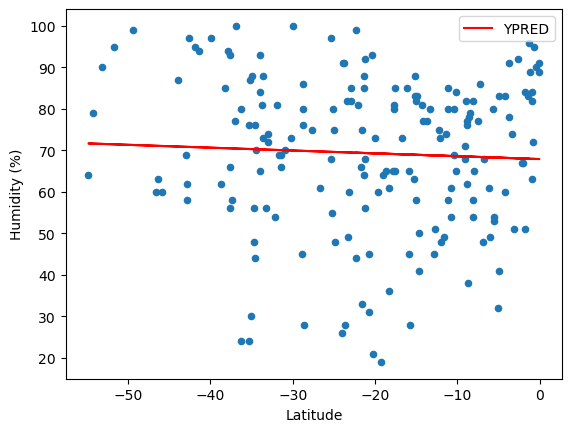

In [71]:
x = southern_hemisphere['Latitude'].values.reshape(-1, 1) 
y = southern_hemisphere['Humidity (%)'].values.reshape(-1, 1) 
model = LinearRegression()
model.fit(x, y)

southern_hemisphere['YPRED'] = model.predict(x)
ax = southern_hemisphere.plot.scatter(x='Latitude', y='Humidity (%)')
southern_hemisphere.plot(x='Latitude', y='YPRED', color='red', ax=ax)
# same as above, though it does seem a bit less humid overall the further south you go from the equator

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

C:\Users\Athen\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Latitude', ylabel='Cloudiness (%)'>

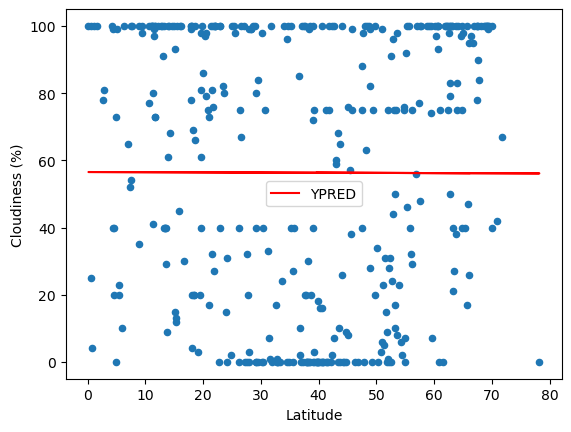

In [72]:
x = northern_hemisphere['Latitude'].values.reshape(-1, 1) 
y = northern_hemisphere['Cloudiness (%)'].values.reshape(-1, 1) 
model = LinearRegression()
model.fit(x, y)

northern_hemisphere['YPRED'] = model.predict(x)
ax = northern_hemisphere.plot.scatter(x='Latitude', y='Cloudiness (%)')
northern_hemisphere.plot(x='Latitude', y='YPRED', color='red', ax=ax)
# it's either very cloudy or not cloudy at all. the model seems to be predicting a close to 60% chance of cloudiness when you're over 0 on the latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

C:\Users\Athen\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Latitude', ylabel='Cloudiness (%)'>

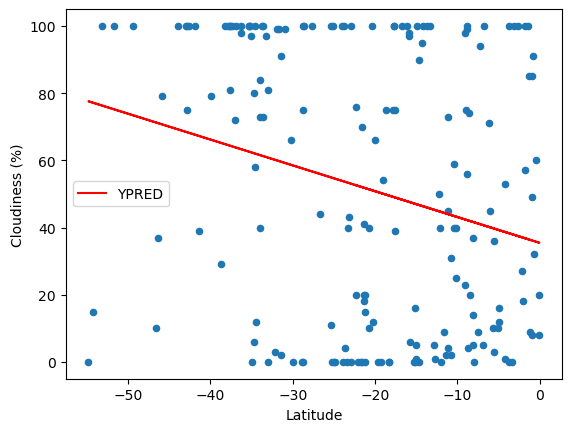

In [73]:
x = southern_hemisphere['Latitude'].values.reshape(-1, 1) 
y = southern_hemisphere['Cloudiness (%)'].values.reshape(-1, 1) 
model = LinearRegression()
model.fit(x, y)

southern_hemisphere['YPRED'] = model.predict(x)
ax = southern_hemisphere.plot.scatter(x='Latitude', y='Cloudiness (%)')
southern_hemisphere.plot(x='Latitude', y='YPRED', color='red', ax=ax)
# this one is interesting, it seems that the further away from the equator you are, the cloudier it gets. as you approach it, you're less likely to see clouds.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

C:\Users\Athen\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Latitude', ylabel='Wind Speed (m/s)'>

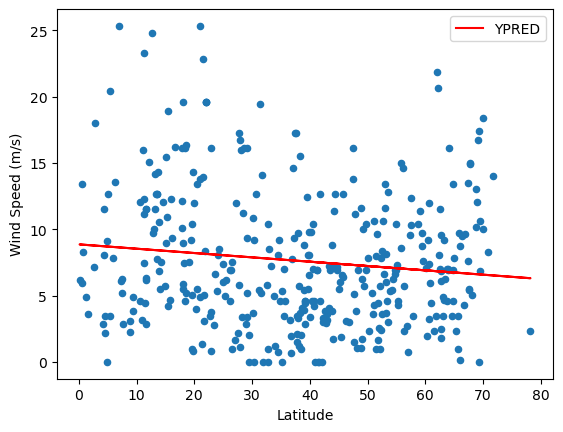

In [76]:
x = northern_hemisphere['Latitude'].values.reshape(-1, 1) 
y = northern_hemisphere['Wind Speed (m/s)'].values.reshape(-1, 1) 
model = LinearRegression()
model.fit(x, y)

northern_hemisphere['YPRED'] = model.predict(x)
ax = northern_hemisphere.plot.scatter(x='Latitude', y='Wind Speed (m/s)')
northern_hemisphere.plot(x='Latitude', y='YPRED', color='red', ax=ax)
# this model is predicting that wind will be a bit less intense the higher your latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

C:\Users\Athen\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Latitude', ylabel='Wind Speed (m/s)'>

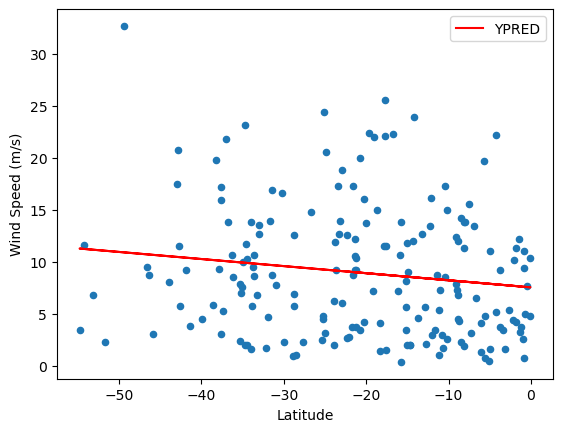

In [77]:
x = southern_hemisphere['Latitude'].values.reshape(-1, 1) 
y = southern_hemisphere['Wind Speed (m/s)'].values.reshape(-1, 1) 
model = LinearRegression()
model.fit(x, y)

southern_hemisphere['YPRED'] = model.predict(x)
ax = southern_hemisphere.plot.scatter(x='Latitude', y='Wind Speed (m/s)')
southern_hemisphere.plot(x='Latitude', y='YPRED', color='red', ax=ax)
# this seems to be a bit inverse. it's trying to predict that as you get closer to the equator, you'll get a bit less wind, which looks like the same prediction as above, so that almost seems to contradict each other.